## Customer Segmentation using Machine Learning

## Unsupervised Learning

We will implement customer segmentation in Python. Whenever you need to find your best customer, customer segmentation is the ideal methodology.
We will explore the data upon which we will be building our segmentation model. Also, in this data science project, we will see the descriptive analysis of our data and then implement several versions of the K-means algorithm.

Customer Segmentation is one the most important applications of <span class="girk">unsupervised learning</span>. Using clustering techniques, companies can identify the several segments of customers allowing them to target the potential user base. In this machine learning project, we will make use of <span class="girk">K-means clustering</span> which is the essential algorithm for clustering unlabeled dataset. Before ahead in this project, learn what actually customer segmentation is.

#### Business Scenario

Suppose we are working as a data scientist for a FMCG company and want to segment our customers to help the marketing department for them to launch new products and sales based on the segmentation. Therefore we will save our time and money by marketing a specific group of customers with selected products.
How Did we collect the data by the way?
All data has been collected through the loyalty cards they use at checkout :)
We will utilize K-Means and PCA algorithms for this project and see how we define new grouped customers!

#### Understanding Data is Important!
Before starting any project, We need to understand the business problem and dataset first.
Let’s see the variables(features) in the dataset.
#### Variable Description
ID: Shows a unique identification of a customer.

Sex: Biological sex (gender) of a customer. In this dataset, there are only 2 different options.
0: male
1: female

Marital status: Marital status of a customer.
0: single
1: non-single (divorced / separated / married / widowed)

Age: The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of the creation of the dataset
18 Min value (the lowest age observed in the dataset)
76 Max value (the highest age observed in the dataset)

Education: Level of education of the customer.
0:other / unknown
1: high school
2: university
3: graduate school

Income: Self-reported annual income in US dollars of the customer.
35832 Min value (the lowest income observed in the dataset)
309364 Max value (the highest income observed in the dataset)

Occupation: Category of occupation of the customer.
0: unemployed/unskilled
1: skilled employee / official
2: management / self-employed / highly qualified employee / officer

Settlement size: The size of the city that the customer lives in.
0: small city
1: mid-sized city
2: big city


## Libraries

In [180]:
#Importing libraries
import numpy as np
import pandas as pd
import scipy

#These are the visualization libraries.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import StandardScaler

#Hierarchical clustering with the Sci Py library. We'll use the dendrogram and linkage modules.
from scipy.cluster.hierarchy import dendrogram, linkage
#Sk learn is one of the most widely used libraries for machine learning. We'll use the k means and pca modules.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# We need to save the models, which we'll use in the next section. We'll use pickle for that.
import pickle

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [181]:
#Importing data
data = pd.read_csv("segmentation data.csv",index_col = 0)
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


## Explore Data

In [182]:
#Describe the data
data.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [183]:
#Types of data
data.dtypes

Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

In [184]:
#Check the data

data.isnull()
data.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

## Correlation Estimate

A good way to get an initial understanding of the relationship between the different variables is to explore how they correlate.

In [185]:
#correlation between our variables using corr method in the pandas library.
data.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


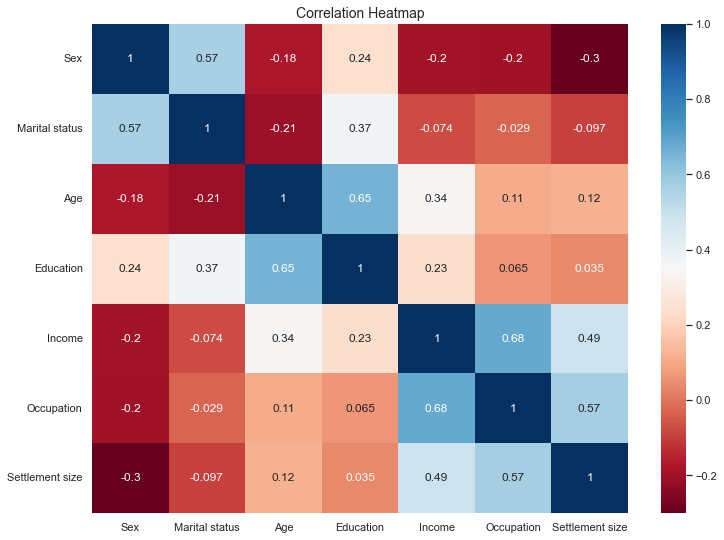

In [186]:
#Using Correlation Heatmap
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

Let’s explore the correlation.
We see that there is a strong correlation between Education and Age. In other words, older people tend to be more highly educated.
How about income and occupation?
Their correlation is 0.68. That means If you have a higher salary, you are more likely to have a higher-level occupation such as a manager.
Correlation matrix is a very useful tool to analyze the relationship between features.
Now, we understand our dataset and have a general idea of it.
Next section will be the segmentation. But before that, we need to scale our data first.

## Data Pre-Processing 

We need to apply standardization to our features before using any distance-based machine learning model such as K-Means, KNN.
In general, We want to treat all the features equally and we can achieve that by transforming the features in such a way that their values fall within the same numerical range such as [0:1].
This process is commonly referred to as Standardization.

## Standarization

Now that we cleared that up. It is time to perform standardization in Python.

In [187]:
# Standardizing data, so that all features have equal weight. 
#This is important for modelling.
# Otherwise, in our case Income would be considered much more important than Education for Instance. 
# We do not know if this is the case, so we would not like to introduce it to our model. 
# This is what is also refered to as bias.
scaler = StandardScaler()
df_std = scaler.fit_transform(data)

In [188]:
df_std = pd.DataFrame(data = df_std, columns = data.columns)

## Visualize Raw Data

Text(0.5, 1.0, 'Visualization of raw data')

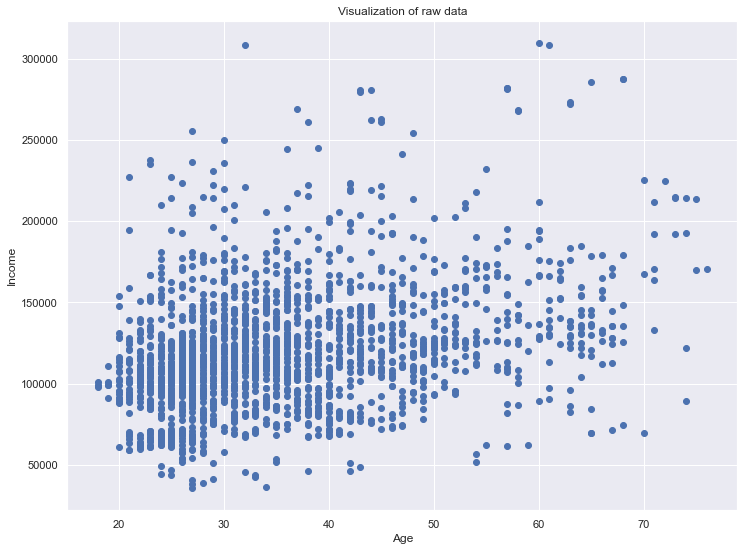

In [189]:
# We'll plot the data. We create a 12 by 9 inches figure.
# We have 2000 data points, which we'll scatter acrros Age and Income, 
#located on positions 2 and 4 in our data set. 
plt.figure(figsize = (12, 9))
plt.scatter(data.iloc[:, 2], data.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

## Building Our Segmentation Model

## K-Means Clustering

Before applying the K-Means algorithm we need to choose how many clusters we would like to have.
But How?
There are two components. Within Clusters Sum of Squares(WCSS) and Elbow Method.

In [190]:
# Perform K-means clustering. We consider 1 to 10 clusters, so our for loop runs 10 iterations.
# In addition we run the algortihm at many different starting points - k means plus plus. 
# And we set a random state for reproducibility.
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

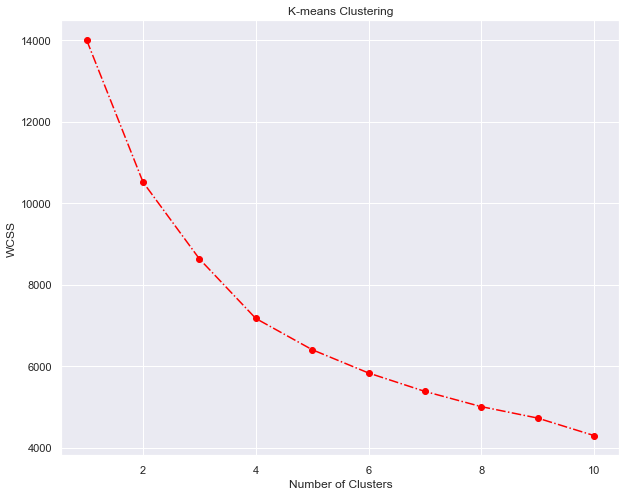

In [191]:
# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters. 
# We look for a kink in the graphic, after which the descent of wcss isn't as pronounced.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

The elbow in the graph is the four-cluster mark. This is the only place until which the graph is steeply declining while smoothing out afterward.
Let’s perform K-Means clustering with 4 clusters.

In [192]:
# We run K-means with a fixed number of clusters. In our case 4.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

#### Fitting Our Model to the Dataset

In [166]:
# We divide our data into the four clusters.
kmeans.fit(df_std)

KMeans(n_clusters=4, random_state=42)

We create a new data frame with the original features and add a new column with the assigned clusters for each point.

## Results

In [167]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans= df_std.copy()
df_segm_kmeans = pd.DataFrame(data = df_std, columns = data.columns)
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [170]:
df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,2
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,1
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3


In [171]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.090136,0.391040,1.689452,1.819919,0.981226,0.499317,0.457039
1,-0.209147,-0.954062,-0.028257,-0.485711,-0.606168,-0.754190,-0.856438
2,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380
3,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888


It’s time to interpret our new dataset,

Let’s start with the <span class="girk">first segment</span>, Compared to other clusters, we realize that this is the oldest segment. The well off segment.

For the <span class="girk">second segment</span>, we can say,
This segment has the lowest values for the annual salary.
They live almost exclusively in small cities
With low income living in small cities, it seems that this is a segment of people with fewer opportunities.

Let’s carry on with the <span class="girk">third segment</span>,
This is the youngest segment with an average age of 29. They have medium level of education and average income.

They also seem average about every parameter we can label the segment average or standard.

Finally, we come to the <span class="girk">fourth segment</span>,
It is comprised almost entirely of men, less than 20 percent of whom are in relationships.

Looking at the numbers, we observe relatively low values for education, paired with high values for income and occupation.

The majority of this segment lives in big or middle-sized cities.
Let’s label the segment according to their relevance.

In [173]:
#Let’s label the segment according to their relevance. Rename
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
well-off,0.090136,0.391040,1.689452,1.819919,0.981226,0.499317,0.457039
fewer-opportunities,-0.209147,-0.954062,-0.028257,-0.485711,-0.606168,-0.754190,-0.856438
standard,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380
career focused,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888


In [174]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off', 
                                                                  1:'fewer opportunities',
                                                                  2:'standard', 
                                                                  3:'career focused'})

In [175]:
df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,Labels
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0,well-off
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,2,standard
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,1,fewer opportunities
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3,career focused
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3,career focused


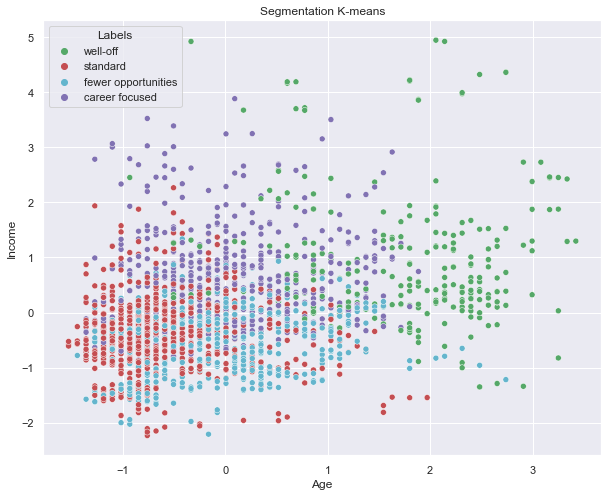

In [176]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

We can see the green segment well off is clearly separated as it is highest in both age and income. But the other three are grouped together.
We can conclude that K-Means did a decent job! However, it’s hard to separate segments from each other.
In the next section, we will combine PCA and K-Means to try to get a better result.

## PCA with K-Means for Better Visualization

What we will do here is apply dimensionality reduction to simplify our problem.
We will choose reasonable components in order to obtain a better clustering solution than with the standard K-Means. So that We aim to see a nice and clear plot for our segmented groups.

In [193]:
# Employ PCA to find a subset of components, 
#which explain the variance in the data.
pca = PCA()

In [194]:
# Fit PCA with our standardized data.
pca.fit(df_std)

PCA()

Now, Let’s see the explained variance ratio by each component

In [195]:
# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

We observe that the first component explains around 36 % of the variability of the data. The second one is 26 % and so on.
We now can plot the cumulative sum of explained variance.

##### Component variability visualization

Text(0, 0.5, 'Cumulative Explained Variance')

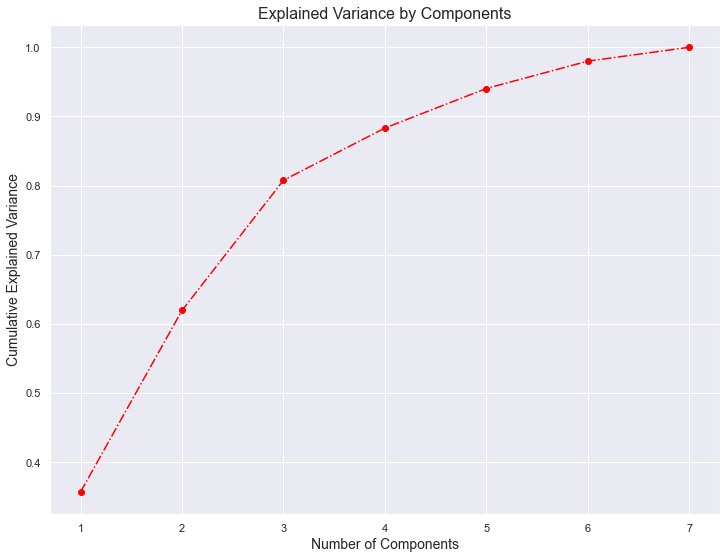

In [196]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '-.',color='red')
plt.title('Explained Variance by Components',fontsize=16)
plt.xlabel('Number of Components',fontsize=14)
plt.ylabel('Cumulative Explained Variance',fontsize=14)

Well, <span class="girk">How do we choose the right number of components?</span> The answer is there is no right or wrong answer for that.
But, <span class="mark">a rule of thumb is to keep at least 70 to 80 percent of the explained variance</span>.
80 % of the variance of the <span class="girk">data is explained by the first 3 components</span>. Let’s keep the first 3 components for our further analysis.

In [197]:
# We choose three components. 3 or 4 seems the right choice according to the previous graph.
pca = PCA(n_components = 3)

In [198]:
#Fit the model the our data with the selected number of components. In our case three.
pca.fit(df_std)

PCA(n_components=3)

## PCA Results

In [200]:
# The components attribute shows the loadings of each component on 
#each of the seven original features.
# The loadings are the correlations between the components and the original features. 
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

The result is a 3 by 7 array. <span class="girk">We reduced our futures to three components from the original 7 values</span> that explain the shape the values themselves show the so-called <span class="mark">loadings</span>.
Hey, just a minute, what is loading then?
<span class="mark">Loadings are correlations between an original variable and the component</span>.
For instance, the first value of the array shows the loading of the first feature on the first component (Exp. Sex with First component).
Let’s put this information in a pandas data frame so that we can see them nicely. 

Columns are seven original features and rows are three components that PCA gave us.

##### Creating a new PCA data 

In [201]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = data.columns,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


##### Correlation Heatmap

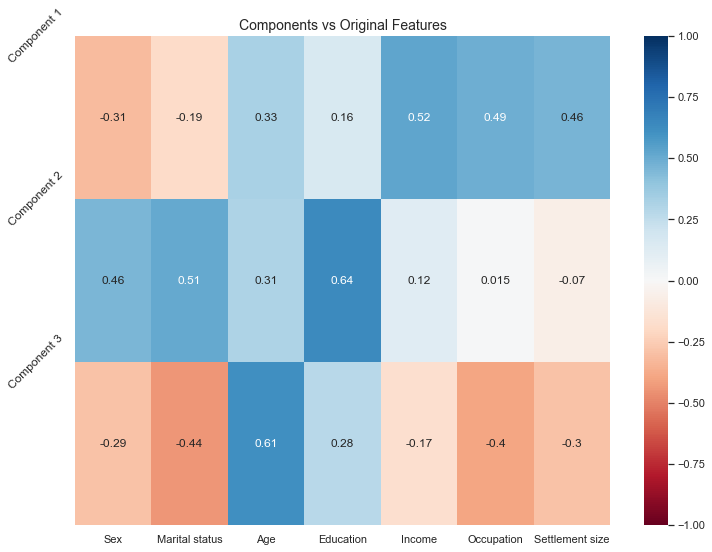

In [202]:
# Heat Map for Principal Components against original features. 
#Again we use the RdBu color scheme and set borders to -1 and 1.
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

We see that there is a positive correlation between Component1 and Age,Income, Occupation and Settlement size. These are strictly related to the career of a person. So this component shows the career focus of the individual.

For the second component Sex, Marital status and Education are by far the most prominent determinants.

For the final component, we realize that Age, Marital Status, and Occupation are the most important features. We observed that marital status and occupation load negatively but are still important.

Now, we have an idea about our new variables(components). We can clearly see the relationship between components and variables.
Let’s transform our data and save it scores_pca.

In [203]:
pca.transform(df_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [204]:
scores_pca = pca.transform(df_std)

## K-Means Clustering with PCA

Our new dataset is ready! It’s time to apply K-Means to our brand new dataset with 3 components.

In [206]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

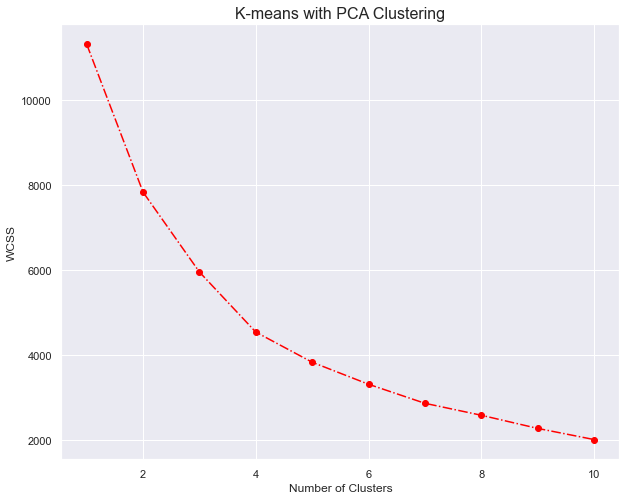

In [207]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
# Again it looks like four is the best option.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering',fontsize = 16)
plt.show()

We see that the optimal cluster number by within sum of square is 4.

In [208]:
# We have chosen four clusters, so we run K-means with number of clusters equals four. 
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [209]:
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

K-Means algorithm has learnt from our new components and created 4 clusters . I would like to see old datasets with new components and labels .

## K-Means Clustering with PCA Results

In [210]:
# We create a new data frame with the original features and 
# add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([data.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [211]:
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1


In [212]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


Above we see our data grouped by K-Means Segment. We can also convert segment numbers to the label and see the observation number and proportions of each segment by total observation.

In [213]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
career focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
fewer opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


We obtained columns and changed the name with a few line of codes.Now, Let’s plot the our new segments and see differences.

In [214]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})

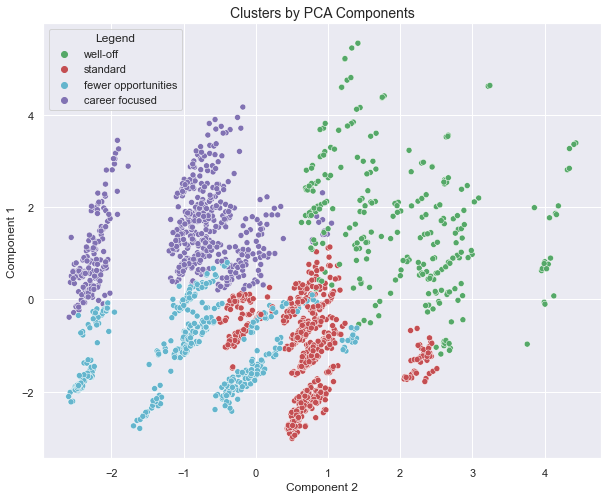

In [215]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components',fontsize=14)
plt.show()

When we plotted the K means clustering solution without PCA, we were only able to distinguish the green segment, but the division based on the components is much more pronounced.
That was one of the biggest goals of PCA to reduce the number of variables by combining them into bigger ones.


## Conclusion
We segmented our customers into 4 groups. We are ready to start to choose our groups based on our aims and marketing them!
Segmentation helps marketers to be more efficient in terms of time, money and other resources.
They gain a better understanding of customer's needs and wants and therefore can tailor campaigns to customer segments most likely to purchase products.